# Main Code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#evual
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn import metrics

class evaluate_model:

    def __init__(self):
        self.message = 'Running'

    def __repr__(self):
        return self.message

    @staticmethod
    def plot_loss_acc_curves(history):
        """Plot the loss and accuracy curves for training and validation data"""
        fig, ax = plt.subplots(2,1)
        ax[0].plot(history.history['loss'], color='b', label="Training loss")
        ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
        legend = ax[0].legend(loc='best', shadow=True)

        ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
        ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
        legend = ax[1].legend(loc='best', shadow=True)
        plt.show()

    @staticmethod
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=90)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

    @staticmethod
    def Clf_report(model,Ytrue,YPred):
        print("Classification report for classifier %s:\n%s\n"
              % (model, metrics.classification_report(Ytrue, YPred)))


In [ ]:
#model 

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D

class CNN:

  @staticmethod
  def model_build(width, height, ch , Num_classes):
    model = Sequential()

    model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu',input_shape=(width, height, ch)))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization(axis=3))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 128, kernel_size = (5,5), activation ='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters = 128, kernel_size = (5,5), activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization(axis=3))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization(axis=3))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(256, activation = "relu")) #Fully connected layer
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(60, activation = "relu")) #Fully connected layer
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(Num_classes, activation = "softmax")) #Classification layer or output layer

    model.summary()

    return model


In [ ]:
#process_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os,cv2

class Img_dataset:

    def __init__(self,Shape,Channel):
        self.shape = Shape
        self.channel = Channel


    @staticmethod
    def get_imgInfo(file_dir,have_group = False):

        if have_group :
            Categories = os.listdir(file_dir)
            for category in Categories:
                print('{} {} images'.format(category, len(os.listdir(os.path.join(file_dir,category)))))
            #Load the data to dataframe
            data=[]
            for category_id, category in enumerate(Categories):
                for imgfile in os.listdir(os.path.join(file_dir,category)):
                    data.append(['{}/{}/{}'.format(file_dir,category,imgfile),category_id,category])
            column = ['img_path','category_id','category']
            print("Note --> categories available !")
        else:
            data = []
            for imgfile in os.listdir(file_dir):
                data.append(['{}/{}'.format(file_dir,imgfile),imgfile])
            column = ['img_path','img']
        return pd.DataFrame(data,columns=column)


    def disp_group_image(self,data,no_img=6):
         #if there is 'category' inside the dataframe columns
         #np.any(axis=none) : at least 1 true appear, return true
        if np.any(data.columns == 'category'):
             group = data['category'].unique()
             Num_group = len(group)
             fig = plt.figure(1, figsize=(Num_group,Num_group))
             grid = ImageGrid(fig, 111, nrows_ncols=(Num_group, Num_group), axes_pad=0.05)
             i2 = -1
             for grp in group:
                 img_path = np.array(data[data['category'] == grp]['img_path'])
                 for i,imgdir in enumerate(img_path):
                     if i < Num_group:
                         i2 = i2 + 1
                         img = cv2.imread(imgdir)
                         img = cv2.resize(img,dsize =(self.shape,self.shape),interpolation = cv2.INTER_AREA)
                         ax = grid[i2] #Put img into grid with specific position
                         ax.imshow(img)
                         ax.axis('off')
                     else:
                         #Display each group name across each row
                         ax.text(self.shape+30, self.shape/2, grp, verticalalignment='center')
                         break
        else:
             i2 = -1
             fig = plt.figure(1, figsize=(no_img,no_img))
             grid = ImageGrid(fig, 111, nrows_ncols=(no_img, no_img), axes_pad=0.05)
             img_path = np.array(data['img_path'])
             for i,imgdir in enumerate(img_path):
                if i < no_img*no_img:
                    i2 = i2 + 1
                    img = cv2.imread(imgdir)
                    img = cv2.resize(img,dsize =(self.shape,self.shape),interpolation = cv2.INTER_AREA)
                    ax = grid[i2] #Put img into grid with specific position
                    ax.imshow(img)
                    ax.axis('off')
                else:
                    break
        plt.show()


    def load_image(self,data,extract = False,lwr_hsv=None,upr_hsv=None):
        img_data = []
        img_path = data['img_path']
        getImg = True
        for imgdir in img_path:
            img = cv2.imread(imgdir)

            if extract :
                if lwr_hsv and upr_hsv :
                    blurr = cv2.GaussianBlur(img,(5,5),0)
                    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
                    mask = cv2.inRange(hsv,lwr_hsv,upr_hsv)
                    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
                    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
                    boolean = mask>0
                    new_img = np.zeros_like(img,np.uint8)
                    new_img[boolean] = img[boolean]
                    res_img = new_img
                    if getImg:
                        plt.subplot(2,3,1);plt.imshow(img)# ORIGINAL
                        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
                        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
                        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
                        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
                        plt.subplot(2,3,6);plt.imshow(new_img)# NEW PROCESSED IMAGE
                        plt.axis('off')
                        plt.show()
                        getImg = False
                else:
                    raise ValueError('lwr_hsv or upr_hsv arguments are empty !')

            else:
                blurr = cv2.GaussianBlur(img,(5,5),0)
                rgb = cv2.cvtColor(blurr,cv2.COLOR_BGR2RGB)
                res_img = rgb

            rez_img = cv2.resize(res_img,dsize =(self.shape,self.shape),interpolation = cv2.INTER_AREA)
            rez_img = rez_img.reshape(self.shape,self.shape,self.channel)
            img_data.append(rez_img)

        return img_data


In [ ]:
#tool
from datetime import datetime
import numpy as np
import zipfile
from shutil import unpack_archive
import os

class tools:

    @staticmethod
    def start_end_timer(start_time=None):
        if not start_time:
            start_time = datetime.now()
            return start_time
        elif start_time:
            thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
            tmin, tsec = divmod(temp_sec, 60)
            print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

    @staticmethod
    def data_size(data,format = 'B'):
        if not isinstance(data,np.ndarray):
            raise TypeError('It is not an array !')

        if format == 'B':
            format_bytes = 1
        elif format == 'MB':
            format_bytes = 2**20 # 1 Megabyte is 1,048,576 bytes
        elif format == 'GB':
            format_bytes = 2**30 # 1 Gigabyte is 1,073,741,824 bytes
        else:
            raise Exception('choose B, MB & GB only !')


        total = data.nbytes/format_bytes
        return '{:.2f} {}'.format(total,format)


    @staticmethod
    def check_zip_file(dir_zip):
        with zipfile.ZipFile(dir_zip) as z:
          for filename in z.namelist():
                  print(filename)

    @staticmethod
    def unpack_zip_file(dir_zip,des_dir):
        for zdir in dir_zip:
          unpack_archive(zdir,des_dir)


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json

#from utils_tools import tools
# from model_arch import CNN
# from process_dataset import Img_dataset
# from evaluate_model import evaluate_model as eval_m


""" ***************** """
"""  Extract Dataset  """
""" ***************** """
# #------Kaggle-------
# main_dir = '../input'
# train_dir = main_dir +'/train'
# test_dir = main_dir + '/test'
# #------Kaggle-------

#------Colab--------
main_dir = '/content/drive/MyDrive/plant-seedlings-classification'
train_dir = main_dir +'/train'
test_dir = main_dir + '/test'
train_zip_dir = main_dir + '/train.zip'
test_zip_dir = main_dir + '/test.zip'
# tools.check_zip_file(train_zip_dir)
# tools.unpack_zip_file([train_zip_dir,test_zip_dir],main_dir)
#------Colab--------

size = 80
channel = 3
img_data = Img_dataset(size,channel)
# Num_classes = len(os.listdir(train_dir))
Num_classes = len(['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent','Maize'
 ,'Scentless Mayweed','Shepherds Purse','Small-flowered Cranesbill','Sugar beet'])

Maize 221 images
Fat Hen 475 images
Loose Silky-bent 654 images
Common Chickweed 611 images
Sugar beet 385 images
Common wheat 221 images
Scentless Mayweed 516 images
Small-flowered Cranesbill 496 images
Shepherds Purse 231 images
Cleavers 287 images
Charlock 390 images
Black-grass 263 images
Note --> categories available !


---train_data image grid---


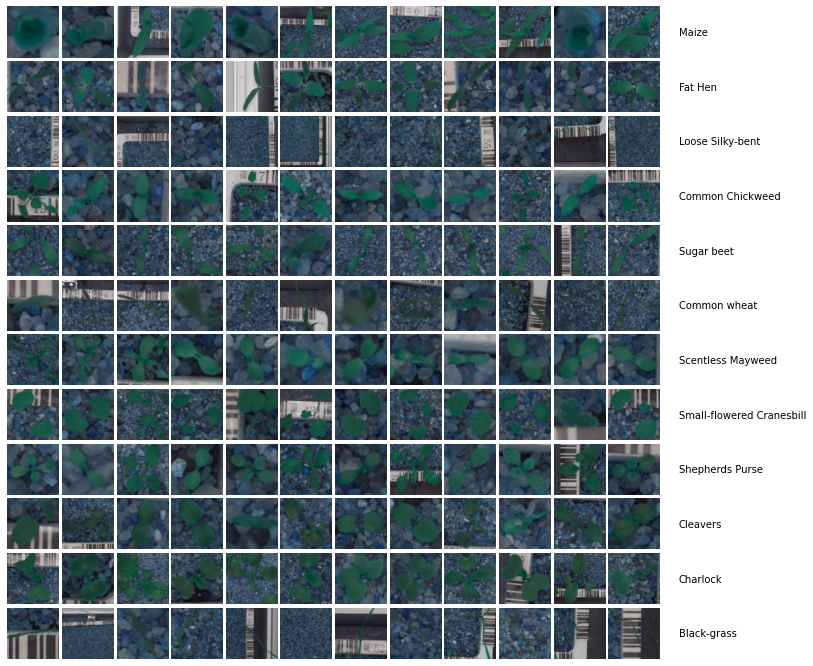

---test_data image grid---


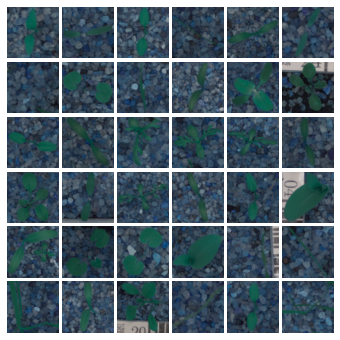



---train_data image-processing---


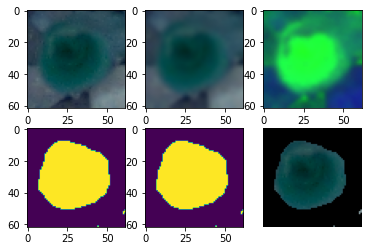

---test_data image-processing---


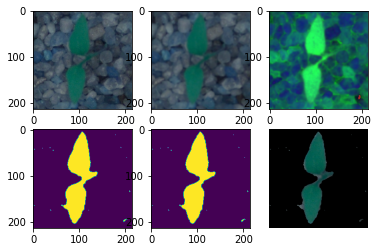



Orignal xtrain shape : (4750, 80, 80, 3)
Orignal xtest shape : (794, 80, 80, 3)


Classes['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


Train data size : 0.68 GB
 Test data size : 0.11 GB

---Split training and validation sets---
xtrain shape : (4275, 80, 80, 3)
ytrain shape : (4275, 12)
  xval shape : (475, 80, 80, 3)
  yval shape : (475, 12)


In [ ]:
""" Loading Train Data """
train_data = img_data.get_imgInfo(train_dir,have_group = True)
train_data.head()


""" Loading Test Data """
test_data = img_data.get_imgInfo(test_dir)
test_data.head()


""" Display an Image in Grid"""
print('\n')
print('---train_data image grid---')
img_data.disp_group_image(train_data)
print('---test_data image grid---')
img_data.disp_group_image(test_data,6)


""" Load Train and Test Data """
lower = (25,40,50)
upper = (75,255,255)
print('\n')
print('---train_data image-processing---')
load_xtrain = img_data.load_image(train_data,extract=True,lwr_hsv=lower,upr_hsv=upper)
print('---test_data image-processing---')
load_xtest = img_data.load_image(test_data,extract=True,lwr_hsv=lower,upr_hsv=upper)

xtrain = np.array(load_xtrain)
xtest = np.array(load_xtest)
print('\n')
print('Orignal xtrain shape : {}'.format(xtrain.shape)) #(4750, dim, dim, 3)
print('Orignal xtest shape : {}'.format(xtest.shape))


"""Normalization"""
#Pixels are represented in the range [0-255],
#but the NN converges faster with smaller values, in the range [0-1].
xtrain = xtrain/255.0
xtest = xtest/255.0


"""Label encoding target variable """
ytrain = train_data.iloc[:,2]
species = ytrain.unique()
labels = preprocessing.LabelEncoder()
labels.fit(species)
encodedlabels = labels.transform(ytrain)
print('\n')
print('Classes'+str(labels.classes_))


""" One Hot Encoding """
ytrain = to_categorical(encodedlabels)


""" Check data memory used"""
print('\n')
print('Train data size : {}'.format(tools.data_size(xtrain,'GB')))
print(' Test data size : {}'.format(tools.data_size(xtest,'GB')))


"""Split training and validation sets"""
#stratify (Classification only) :
#It in train_test_split ensures that there is no overrepresentation of classes in the val set.
#It is used to avoid some labels being overrepresented in the val set.
#Note: only works with sklearn version > 0.17
xtrain, xval, ytrain, yval = train_test_split(xtrain,ytrain, test_size=0.1,random_state=2,stratify=ytrain) # 0.1 = 10%
print('\n---Split training and validation sets---')
print('xtrain shape : {}'.format(xtrain.shape))
print('ytrain shape : {}'.format(ytrain.shape))
print('  xval shape : {}'.format(xval.shape))
print('  yval shape : {}'.format(yval.shape))


### CNN Training

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 76, 76, 64)        4864      
_________________________________________________________________
batch_normalization_8 (Batch (None, 76, 76, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 36, 36, 64)        256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 128)      

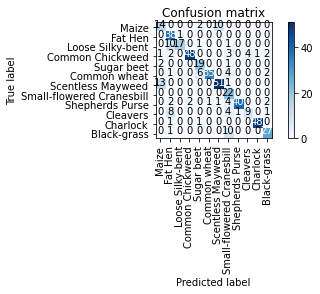

KeyError: ignored

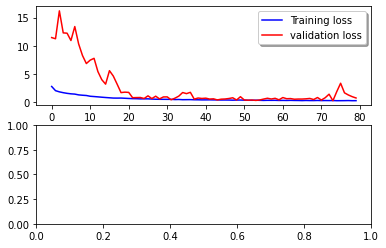

In [ ]:
"""******************"""
"""     CNN Model    """
"""******************"""

"""CNN Architechture"""
""" total_params =
(kernel_height * kernel_width * input_image_channels + 1) * number_of_filters
or
(kernel_height * kernel_width * previous filters (Channels) + 1) * number_of_filters
"""

start_time = tools.start_end_timer(None)
model = CNN.model_build(size,size,channel,Num_classes)


#"categorical_crossentropy": Error rate between the observed labels and the predicted ones
#The metric function "accuracy" is used is to evaluate the performance our model.
#Metric similar to loss function, but its result use only for evaluation.
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


"""******************"""
"""Data augmentation"""
"""******************"""
#We can make your existing dataset even larger.
#The idea is to alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)


"""******************"""
""" Train CNN Model  """
"""******************"""
"""Set a learning rate annealer"""
    #With the ReduceLROnPlateau function from Keras.callbacks,
    #Reduce the LR by half if the accuracy is not improved after exceed patience (epochs).
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

"""Fit the model"""
epochs = 80
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


"""******************"""
"""Evaluate the model"""
"""******************"""
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_model.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_model.plot_loss_acc_curves(history)
evaluate_model.Clf_report(model,Y_true,Y_pred_classes)

In [ ]:
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/plant-seedlings-classification/model.h5")
print("Saved model to disk")

Saved model to disk


# Declare file name 

In [ ]:
Json_name = "/content/PSC_config_V1.json"
H_name = "/content/drive/MyDrive/plant-seedlings-classification/model.h5"

# CNN prediction (loaded pre-trained model)

In [ ]:

""" ************************ """
"""  CNN Predict Test Data   """
""" ************************ """

""" Pre-Train model"""
json_file = open(os.path.join(main_dir,Json_name), 'r')
loaded_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_json)
# load weights into new model
loaded_model.load_weights(os.path.join(main_dir,H_name))
print("Loaded model from local disk")

#y_test = loaded_model.predict(xtest)

# """ Current Train Model"""
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/CNN_PlantSeed_Classification_V1.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)



Loaded model from local disk
